# ASSIGNMENT 2


NAME: Shannon Bytelaar 

ID: 100266317

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

df= pd.read_csv("MPGAuto.csv", na_values=["?"]) 

##### This imports my data set and makes my NA values that were '?' into Nan

# QUESTION 1:
How to check type of a row/observation (numerical value, categorical, or missing)?

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   Origin        398 non-null    int64  
 8   Carname       398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


The df.info() command shows an overview of our dataset.  There are 4 floats, 4 Integers and 1 object, here we can see the non-null count and there are nulls in "Horsepower" Column as it has 392 non-nulls thus missing 6 values as we have 398 total rows. (398-392=6)

#### We have 8 numerical(floats and integers) and 1 categorical(object)

###### 6 missing values in the column "horsepower"


In [3]:
df.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
acceleration    0
model year      0
Origin          0
Carname         0
dtype: int64

# Question 2:
Once missing values are identified, which function to use if using median value as a way to fill in?

#Now it is 398 so we know it has been filled
#Median is not affected by outliers while mean is thus we are choosing to use the median for this dataset.

In [4]:
HPMedian=df['Horsepower'].median() #93.5

df["Horsepower"].fillna(HPMedian, inplace = True) 
#this fills our missing values with the median 93.5

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    398 non-null    float64
 4   Weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   Origin        398 non-null    int64  
 8   Carname       398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


The below code assigns HPMedian to calculate the 'Horsepower' median (which is 93.5). Then I used the .fillna to take all the Nan and fill it with out Horsepower median.

# QUESTION 3:
Identify important features using correlation tests and scatter plots

Here I want to look at the linearity in the scatter plots and the correlation between the variables. I believe I will use the MPG as my dependent variable as its MPG could depend on the independent variables such as acceleration, horsepower,weight, and displacement of the car. 

It will also be interesting to see how a car can be more fuel efficient or less just on the variables of weight,model year, acceleration and/or horsepower etc.

Further more below you can see MPG is fairly normally distributed and has linear form between all other variables. The other varaibles show some polynomial form.

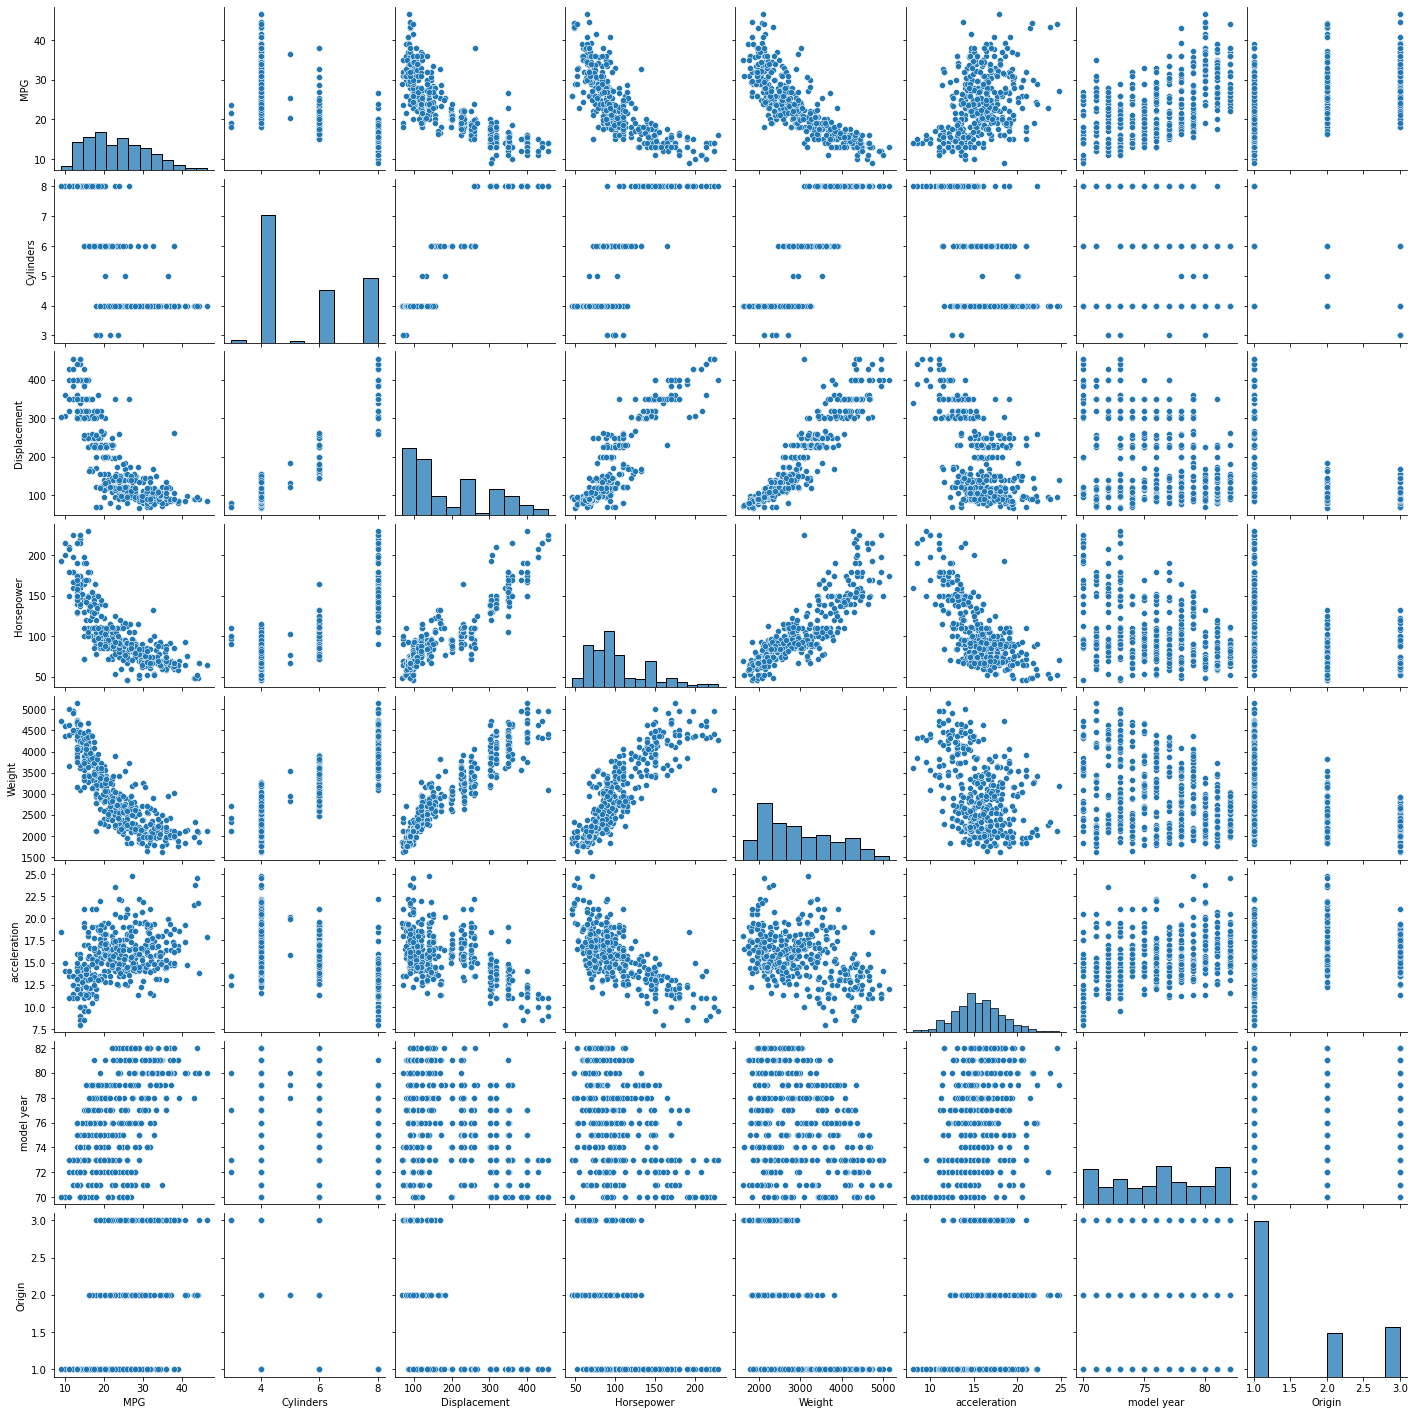

In [5]:
DataVis= sns.pairplot(df)
print(DataVis)

#one hot enoding for origin... Looks like we need to 
#displacement ,Horsepower weight all polynominal ?

C:\Users\cool_\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


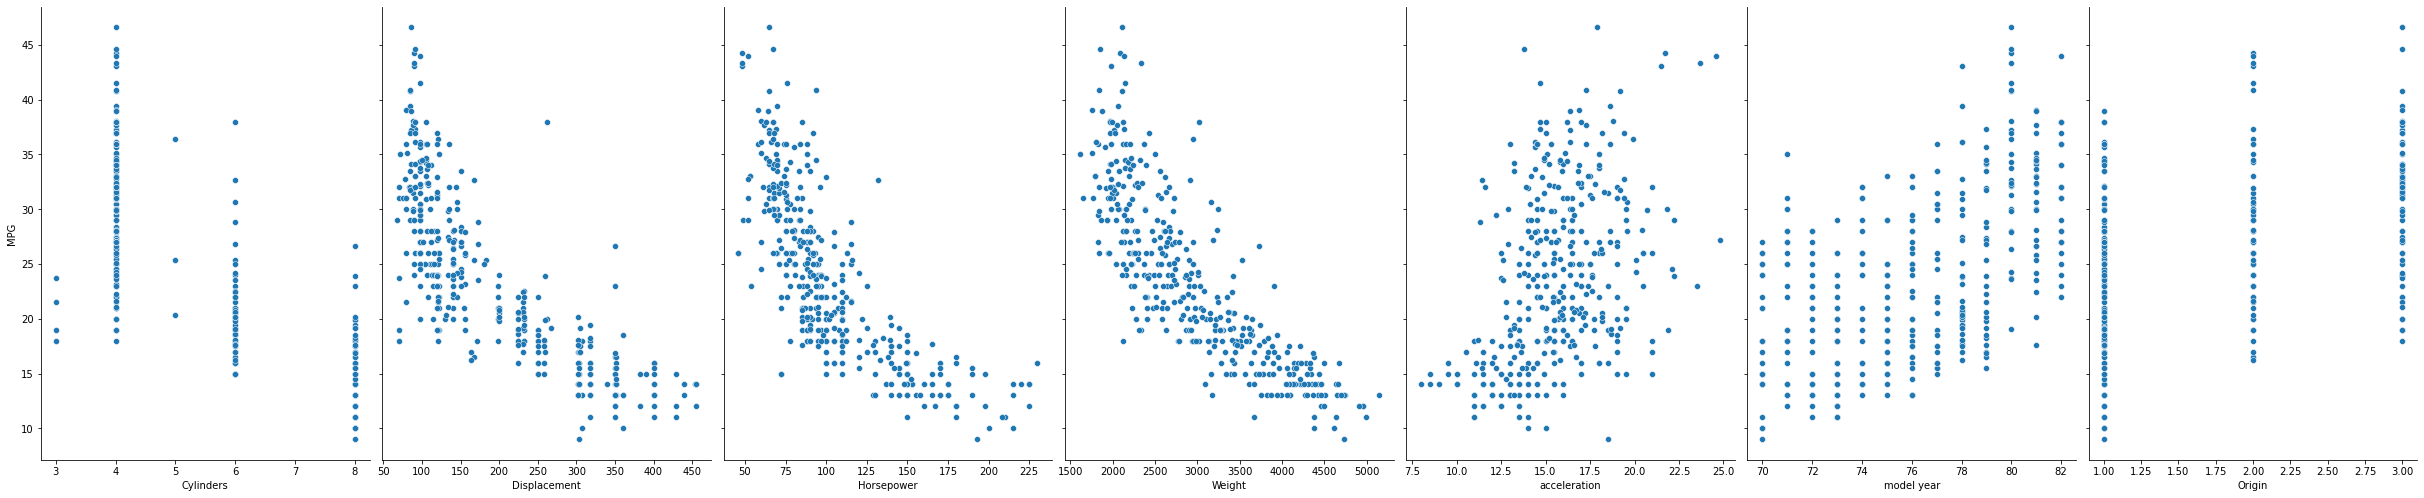

In [6]:
#Checking for linerity in a closer look with MPG
p = sns.pairplot(df, x_vars=['Cylinders','Displacement','Horsepower','Weight','acceleration','model year','Origin'], y_vars='MPG', size=7, aspect=0.7)

#here we can see that Displacement, Horsepower, Weight, and acceleration have some sort of linerality.

# Correlation Heat Map

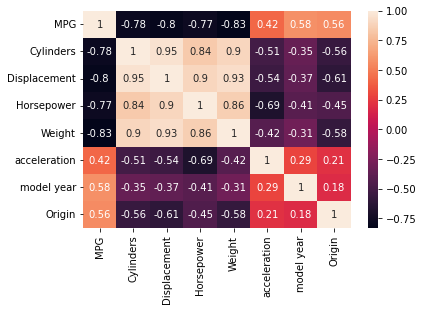

In [7]:
sns.heatmap(df.corr(), annot=True);

# Important Features

Weight, Horsepower, Displacement, and Cylinders are all highly negatively correlated with MPG. They are also all highly correlated with eachother. Thus I will use multipication interaction.

## Dropping Variables


# #1 Carname

Below you can see I checked the different value counts. There are 305 different cartypes.

There are too many car types so I will not be one-hot coding this variable as we would have to make multiple columns.

Instead I will drop this variable when analyzing our data and fitting our model.



In [8]:
C=df['Carname'].value_counts()
C

ford pinto             6
toyota corolla         5
amc matador            5
ford maverick          5
chevrolet chevette     4
                      ..
chevrolet monza 2+2    1
ford mustang ii        1
pontiac astro          1
amc pacer              1
chevy s-10             1
Name: Carname, Length: 305, dtype: int64

In [9]:
# Simple Linear Regression of the Data variables

In [10]:
MPG = df.MPG.values.reshape(len(df['MPG']),1)
Cylinders = df.Cylinders.values.reshape(len(df['Cylinders']),1)
Displacement= df.Displacement.values.reshape(len(df['Displacement']),1)
Horsepower= df.Horsepower.values.reshape(len(df['Horsepower']),1)
Weight= df.Weight.values.reshape(len(df['Weight']),1)
acceleration = df.acceleration.values.reshape(len(df['acceleration']),1)
Origin= df.Origin.values.reshape(len(df['Origin']),1)

In [11]:
# fit the simple linear regression model with the Cylinders feature
Cyl_model = linear_model.LinearRegression()
Cyl_model.fit(Cylinders, MPG)
coeffs_Cyl = np.array(list(Cyl_model.intercept_.flatten()) + list(Cyl_model.coef_.flatten()))
coeffs_Cyl = list(coeffs_Cyl)

# fit the simple linear regression model with the Displacement feature
Dis_model = linear_model.LinearRegression()
Dis_model.fit(Displacement, MPG)
coeffs_Dis = np.array(list(Dis_model.intercept_.flatten()) + list(Dis_model.coef_.flatten()))
coeffs_Dis = list(coeffs_Dis)

# fit the simple linear regression model with the Horsepower feature
Hor_model = linear_model.LinearRegression()
Hor_model.fit(Horsepower, MPG)
coeffs_Hor = np.array(list(Hor_model.intercept_.flatten()) + list(Hor_model.coef_.flatten()))
coeffs_Hor = list(coeffs_Hor)

# fit the simple linear regression model with the Weight feature
W_model = linear_model.LinearRegression()
W_model.fit(Weight, MPG)
coeffs_W = np.array(list(W_model.intercept_.flatten()) + list(W_model.coef_.flatten()))
coeffs_W = list(coeffs_W)

# fit the simple linear regression model with the acceleration feature
acc_model = linear_model.LinearRegression()
acc_model.fit(acceleration, MPG)
coeffs_acc = np.array(list(acc_model.intercept_.flatten()) + list(acc_model.coef_.flatten()))
coeffs_acc = list(coeffs_acc)

# fit the simple linear regression model with the origin feature
org_model = linear_model.LinearRegression()
org_model.fit(Origin, MPG)
coeffs_org = np.array(list(org_model.intercept_.flatten()) + list(org_model.coef_.flatten()))
coeffs_org = list(coeffs_org)


# store the above results in a dictionary and then display using a dataframe
dict_MPG = {}
dict_MPG["Cylinder"] = coeffs_Cyl
dict_MPG["Displacement"] = coeffs_Dis
dict_MPG["Horsepower"] = coeffs_Hor
dict_MPG["Weight"] = coeffs_W
dict_MPG["acceleration"] = coeffs_acc
dict_MPG["Origin"] = coeffs_org


metric_Df_SLR =  pd.DataFrame(dict_MPG)
metric_Df_SLR.index = ['Intercept', 'Coefficient']
metric_Df_SLR

,Cylinder,Displacement,Horsepower,Weight,acceleration,Origin
Intercept,42.949314,35.174750,40.011318,46.317364,4.969793,14.878297
Coefficient,-3.562887,-0.060282,-0.158160,-0.007677,1.191205,5.490795


In [12]:
# now calculate R^2
cyl_rsq = Cyl_model.score(Cylinders, MPG)
dis_rsq = Dis_model.score(Displacement, MPG)
hor_rsq = Hor_model.score(Horsepower, MPG)
weight_rsq = W_model.score(Weight, MPG)
acc_rsq = acc_model.score(acceleration, MPG)
Org_rsq = org_model.score(Origin, MPG)

list_rsq = [cyl_rsq, dis_rsq, hor_rsq, weight_rsq, acc_rsq, Org_rsq]
list_rsq

[0.6012393994439937,
 0.6467421834257859,
 0.5982298596661232,
 0.6917929800341573,
 0.176642769635589,
 0.3174763079292734]

In [13]:
metric_Df_SLR.loc['R-Squared'] = list_rsq
metric_Df_SLR

,Cylinder,Displacement,Horsepower,Weight,acceleration,Origin
Intercept,42.949314,35.174750,40.011318,46.317364,4.969793,14.878297
Coefficient,-3.562887,-0.060282,-0.158160,-0.007677,1.191205,5.490795
R-Squared,0.601239,0.646742,0.598230,0.691793,0.176643,0.317476


In [14]:
# Here we can see the Rsquared results for simple linear relationship with MPG.

# QUESTION 4:
Establish a linear regression model and interpret the results of the regression model. Note that
split the dataset into 2 using a ratio of 80:20 as for training and testing sets. Train the regression model on training set.



My y will be MPG as it is dependent variable, it looks fairly normally distrubuited as well. and will depend on my X variables. So MPG is affected by the independent variables.
My x will be all independent variables that have some sort of linerity. x= Displacement, Horsepower, "Weight". Acceleration looks like it may be too low of a correlation as it is 0.40 (this may create noise during our prediction) while the others are closer to 0.70.


## MODEL 1 - Base model

In [15]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy import stats

In [16]:
x = df.drop(["MPG","Carname"],axis=1)
y = df.MPG

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test=train_test_split(x,y,test_size=0.2)

In [18]:
x=sm.add_constant(x_train)
est=sm.OLS(y_train,x).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     205.3
Date:                Thu, 16 Feb 2023   Prob (F-statistic):          2.27e-112
Time:                        10:06:14   Log-Likelihood:                -831.54
No. Observations:                 318   AIC:                             1679.
Df Residuals:                     310   BIC:                             1709.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -18.9602      5.081     -3.732   

From this first test we can see we got a decent R-squared score of 0.81.
I see the acceleration P score is very high but I would assume the acceleration has some impact on MPG.
I believe Horsepower and acceleration may have some multicolinearity because they are highly correlated together.

Which variables are NOT important? check pvalues... Horsepower is high but we shouldnt remove since we know it is.
Still baseline, we have not done interaction terms or poly..


what has coimpact?



# Model 2

In [19]:
x = df.drop(["MPG","Carname"],axis=1)
y = df.MPG
df['HorsepowerxAcceleration'] = df['Horsepower']*df['acceleration'] # adding interaction variable

In [20]:
x_train,x_test, y_train,y_test=train_test_split(x,y,test_size=0.2)

In [21]:
x=sm.add_constant(x_train)
est=sm.OLS(y_train,x).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     213.5
Date:                Thu, 16 Feb 2023   Prob (F-statistic):          1.59e-114
Time:                        10:06:14   Log-Likelihood:                -826.88
No. Observations:                 318   AIC:                             1670.
Df Residuals:                     310   BIC:                             1700.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -20.1080      5.098     -3.944   

# Comment
From this model we can see that our Horsepower and acceleration has impacted our model to 0.81 r squared value. This is much better as our p values are mostly significant too.
Since Cylinders is quite high I will drop this and see how our model fits after this impact.

# Model 3

In [22]:
x = df.drop(["MPG","Carname","Cylinders"],axis=1)
y = df.MPG

In [23]:
X_train,x_test, y_train,y_test=train_test_split(x,y,test_size=0.2)

In [24]:
x=sm.add_constant(X_train)
est=sm.OLS(y_train,x).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     241.6
Date:                Thu, 16 Feb 2023   Prob (F-statistic):          1.74e-121
Time:                        10:06:14   Log-Likelihood:                -810.54
No. Observations:                 318   AIC:                             1637.
Df Residuals:                     310   BIC:                             1667.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

This resulted in a slighlty higher Rsquared result but displacement has a very high p value so I will omit this as well.

# Model 4

In [25]:
x = df.drop(["MPG","Carname","Cylinders","Displacement"],axis=1)
y = df.MPG

In [26]:
X_train,x_test, y_train,y_test=train_test_split(x,y,test_size=0.2)

In [27]:
x=sm.add_constant(X_train)
est=sm.OLS(y_train,x).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     280.6
Date:                Thu, 16 Feb 2023   Prob (F-statistic):          2.72e-122
Time:                        10:06:14   Log-Likelihood:                -816.89
No. Observations:                 318   AIC:                             1648.
Df Residuals:                     311   BIC:                             1674.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [28]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
y_pred = regr.predict(X_train)


In [29]:
print("R squared: {}".format(r2_score(y_true=y_train,y_pred=y_pred)))

R squared: 0.8440931473728163


R squared is a measure of the algorithms precision. So this shows that our model has a 84.4 % variability in the MPG variable 

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
lin = LinearRegression()
lin.fit(X_train, y_train)

LinearRegression()

In [31]:
y_pred = lin.predict(x_test)
from sklearn.metrics import r2_score
print("Linear Regression R squared of the test set is: {:.2f}".format(r2_score(y_test, y_pred)))

Linear Regression R squared of the test set is: 0.81


## QUESTION 5:
Check the performance of the regression on the test set, using RMSE and MAE indicators.
Make a conclusion on the performance of the model.

RMSE and MAE indicators 

In [32]:
from sklearn.metrics import mean_squared_error
print("Linear Regression MSE of the test set is: {:.2f}".format(mean_squared_error(y_test, y_pred)))

Linear Regression MSE of the test set is: 9.46


In [33]:
lin_rmse = np.sqrt(mean_squared_error(y_pred, y_test))
print("Linear Regression RMSE of the test set is: {:.2f}".format(lin_rmse))

Linear Regression RMSE of the test set is: 3.08


In [34]:
from sklearn.metrics import mean_absolute_error
print("Linear Regression MAE of the test set is: {:.2f}".format(mean_absolute_error(y_test, y_pred)))

Linear Regression MAE of the test set is: 2.31


In [35]:
d = {'true': y_test, 'predicted': y_pred}
dff= pd.DataFrame(data=d)

In [36]:
dff['diff'] = dff['predicted']-dff['true']
dff.head()

,true,predicted,diff
317,34.3,31.521760,-2.778240
192,22.0,20.547026,-1.452974
167,29.0,29.187969,0.187969
261,18.1,20.984134,2.884134
314,26.4,26.573619,0.173619


In [37]:
print("length of the test data is is ",len(x_test))
print("number of the overestimations for the enterprise value is ",len(dff['diff'][dff['diff']>0]))
print("number of the underestimations for the enterprise value is ",len(dff['diff'][dff['diff']<0]))
print("number of the exact estimations for the enterprise value is ",len(dff['diff'][dff['diff']==0]))

length of the test data is is  80
number of the overestimations for the enterprise value is  51
number of the underestimations for the enterprise value is  29
number of the exact estimations for the enterprise value is  0


This shows an interesting look at if our predictions are overestimations or under estimations.

# Conclusion

This shows the model in action. In the True column is the actual y value. In the predicted is my models predictions based on the variables I set in model 4.

The diff column shows the difference between what model 4 predicted and the actual true value. Here we can see a small snippit of how model 4 has a small difference in prediction overall. I think this showcases our MAE (2.53) and RMSE(3.33) accuretly. I am comfortable with this model as these numbers are not huge thus I am confident in my models predictions. 

Also with a Rsquared prediction of 84% I believe it is large enough to be considered useful (not underfitting) but not so accurate that it is only useful for this current dataset. Thus I believe it is not overfitting in this model.

# Visualization of my models predtions accuracy. Overall it is fairly normally distributed.

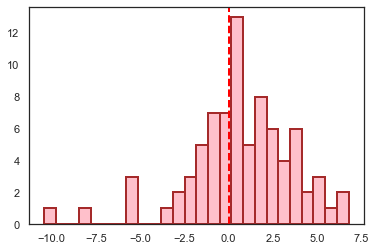

In [38]:
sns.set(style="white")
plt.hist(dff['diff'], bins=26, color="pink", edgecolor='brown', linewidth=2)
plt.axvline(0, color="red", linestyle='dashed', linewidth=2)
plt.show()